#### About Yulu
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

#### Analyzization:
    
1.) Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

2.) How well those variables describe the electric cycle demands

#### Dataset Link : https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot,qqplot_2samples
from scipy.stats import ttest_ind,t,f,f_oneway,ttest_1samp,ttest_ind_from_stats,norm,chi2_contingency,shapiro,levene

In [2]:
yulu=pd.read_csv("bike_sharing.csv")

In [3]:
yulu

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


#### Column Profiling:

datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weather:

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered

### Define Problem Statement and perform Exploratory Data Analysis 

Definition of problem (as per given problem statement with additional views)

Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.

Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.

Illustrate the insights based on EDA

Comments on range of attributes, outliers of various attributes

Comments on the distribution of the variables and relationship between them

Comments for each univariate and bivariate plots

In [5]:
yulu.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [14]:
# Analyzing Data Types of each Column
yulu.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [13]:
# Analyzing any null values in Dataset
yulu.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)

In [11]:
# Analyzing Weather kinds
yulu["weather"].unique()

array([1, 2, 3, 4], dtype=int64)

In [12]:
# Analyzing Season Kinds
yulu["season"].unique()

array([1, 2, 3, 4], dtype=int64)

In [22]:
# Anlayzing Holiday Counts
yulu["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [24]:
# Anlayzing Working Day Counts
yulu["workingday"].value_counts()


1    7412
0    3474
Name: workingday, dtype: int64

In [15]:
yulu["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [17]:
yulu["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

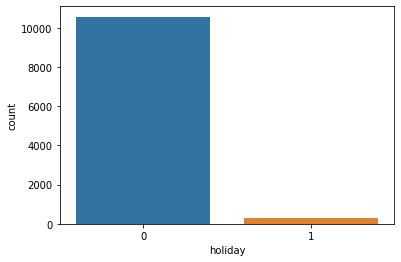

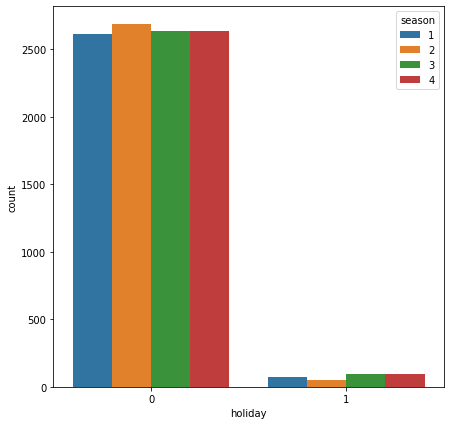

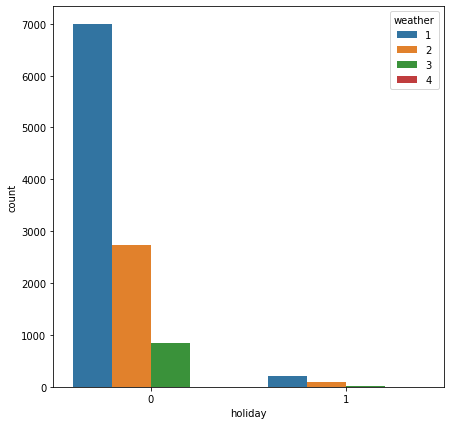

In [99]:
#Uni Variate Analysis
# Holidays countplot
sns.countplot(x=yulu["holiday"])
plt.show()

plt.figure(figsize=(7,7))
sns.countplot(x=yulu["holiday"],hue=yulu["season"])
plt.show()

plt.figure(figsize=(7,7))
sns.countplot(x=yulu["holiday"],hue=yulu["weather"])
plt.show()


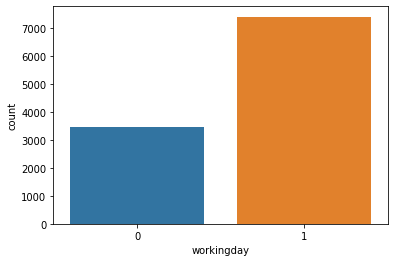

Completely Showing on Working Days yulu Servies are more used


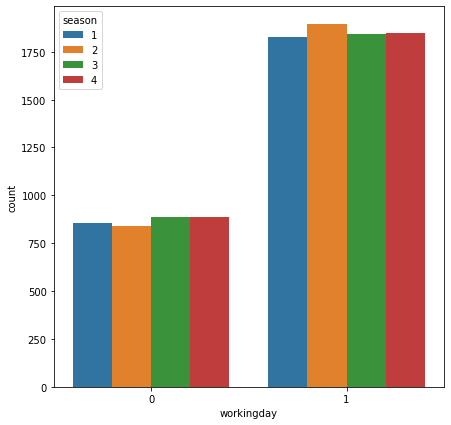

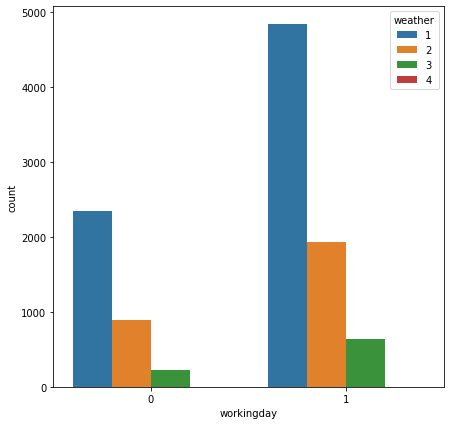

In [96]:

# Univariate Analysis
# working days countplot
sns.countplot(x=yulu["workingday"])
plt.show()
print("Completely Showing on Working Days yulu Servies are more used")

plt.figure(figsize=(7,7))
sns.countplot(x=yulu["workingday"],hue=yulu["season"])
plt.show()


plt.figure(figsize=(7,7))
sns.countplot(x=yulu["workingday"],hue=yulu["weather"])
plt.show()
 

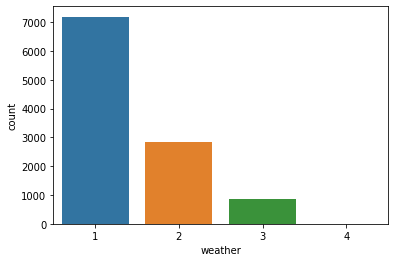

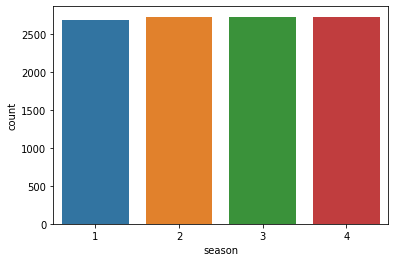

showing Season affect in all season are same


In [97]:
# Analyzing Weather 
sns.countplot(x=yulu["weather"])
plt.show()

# Analyzing Season
sns.countplot(x=yulu["season"])
plt.show()
print("showing Season affect in all season are same")

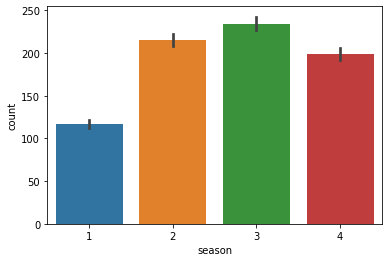

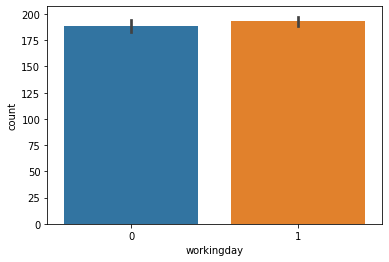

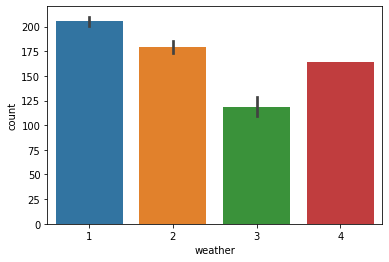

In [98]:
# Bivariate Analysis

# Season Vs Count
sns.barplot(x=yulu["season"],y=yulu["count"])
plt.show()

# Workingday Vs Count
sns.barplot(x=yulu["workingday"],y=yulu["count"])
plt.show()

# Weather Vs Count
sns.barplot(x=yulu["weather"],y=yulu["count"])
plt.show()

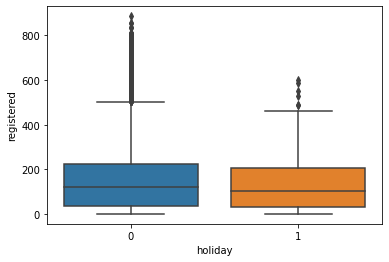

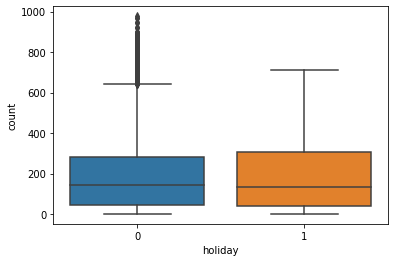

Mean for registerd on holiday -  137.09646302250803
Mean for registerd on No holiday -  156.09494089834516


In [89]:
# Box Plot Analysis for Holiday on Count and registerd
sns.boxplot(x=yulu["holiday"],y=yulu["registered"])
plt.show()

sns.boxplot(x=yulu["holiday"],y=yulu["count"])
plt.show()

# showing mean for holiday and no holiday for registerd are almost same

YesHoliday=yulu[yulu["holiday"]==1]["registered"].mean()
NoHoliday=yulu[yulu["holiday"]==0]["registered"].mean()

print("Mean for registerd on holiday - ",YesHoliday)
print("Mean for registerd on No holiday - ",NoHoliday)

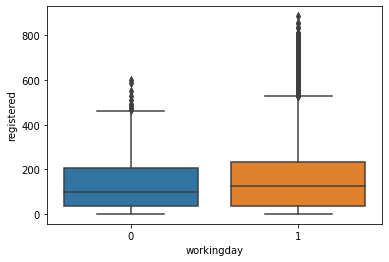

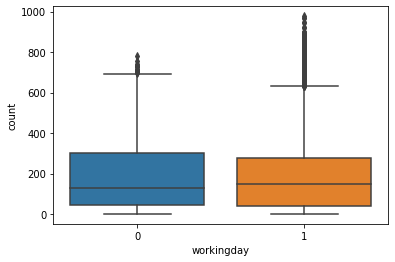

Mean for registerd on workingday -  167.9042093901781
Mean for registerd on No workingday -  129.19833045480715


In [90]:
# Box Plot Analysis for Workingday on Count and registerd
sns.boxplot(x=yulu["workingday"],y=yulu["registered"])
plt.show()

sns.boxplot(x=yulu["workingday"],y=yulu["count"])
plt.show()

# showing mean for holiday and no holiday for registerd are almost same

Yesworkingday=yulu[yulu["workingday"]==1]["registered"].mean()
Noworkingday=yulu[yulu["workingday"]==0]["registered"].mean()

print("Mean for registerd on workingday - ",Yesworkingday)
print("Mean for registerd on No workingday - ",Noworkingday)

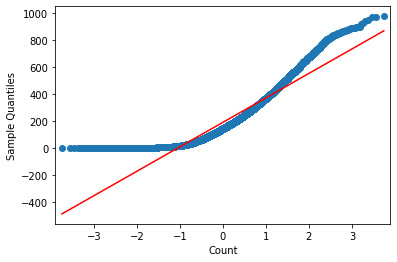

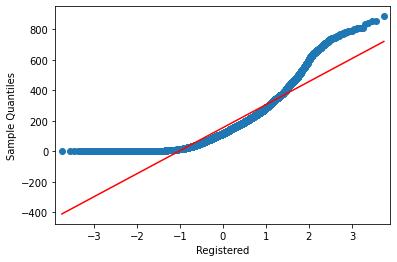

In [78]:
# Checking QQPLOT for count , Registerd

qqplot(yulu["count"],line='s')
plt.xlabel("Count")
plt.show()

qqplot(yulu["registered"],line='s')
plt.xlabel("Registered")
plt.show()

# showing count and registerd follows some normality

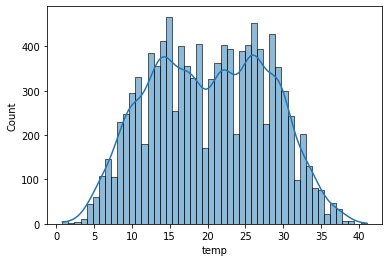

95% of temp Data Lies between [ 6.56   34.3375]


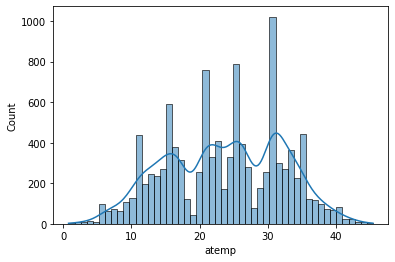

95% of atemp Data Lies between [ 7.575 38.635]


In [111]:
#checking Distributon for temp, atemp

sns.histplot(yulu["temp"],bins=50,kde=True)
plt.show()
a=np.percentile(yulu["temp"],[2.5,97.5])
print("95% of temp Data Lies between",a)

sns.histplot(yulu["atemp"],bins=50,kde=True)
plt.show()
b=np.percentile(yulu["atemp"],[2.5,97.5])
print("95% of atemp Data Lies between",b)

# showing Temp and atemp follows normality

### Hypothesis Testing:

2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented 

ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season 

Chi-square test to check if Weather is dependent on the season 

In [107]:
# Chi-square test

#Ho- Weather and season are independent
#HA- Weather and season are dependent

#Assuming significance level of 5%

pd.crosstab(yulu["weather"],yulu["season"])

test_stat,Pvalue,dof,expected=chi2_contingency(pd.crosstab(yulu["weather"],yulu["season"]))
print(Pvalue)

if Pvalue<0.05:
    print("Reject Null Hypothesis : Weather and season are dependent")
else:
    print("Fail to reject Null Hypothesis : Weather and season are independent")

1.5499250736864862e-07
Reject Null Hypothesis : Weather and season are dependent


In [14]:
# Annova Test on count and season

#Ho- No. of Cycles rented in different  season is similar
#HA- No. of Cycles rented in different  season is Different

#Assuming significance level of 5%

s1=yulu[yulu["season"]==1]["count"]
s2=yulu[yulu["season"]==2]["count"]
s3=yulu[yulu["season"]==3]["count"]
s4=yulu[yulu["season"]==4]["count"]

f_stat,Pvalue=f_oneway(s1,s2,s3,s4)

if Pvalue<0.05:
    print("Reject Null Hypothesis : No. of Cycles rented in different  season is Different")
else:
    print("Fail to reject Null Hypothesis : No. of Cycles rented in different  season is similar")

Reject Null Hypothesis : No. of Cycles rented in different  season is Different


In [47]:
# Checking Levene On Weather and count 

#Ho- No Difference in Variace
#HA- Difference in variance for different weather
stat,Pvalue=levene(yulu[yulu["weather"]==1]["count"],yulu[yulu["weather"]==2]["count"],
                   yulu[yulu["weather"]==3]["count"],yulu[yulu["weather"]==4]["count"])

if Pvalue<0.05:
    print("Reject Null Hypothesis :  Difference in variance for different weather")
else:
    print("Fail to reject Null Hypothesis : No Difference in Variace")

Reject Null Hypothesis :  Difference in variance for different weather


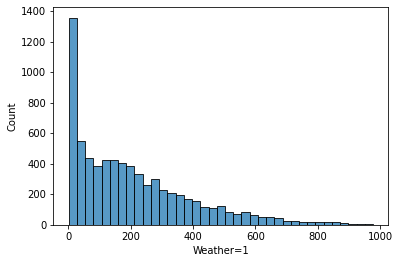

C:\Users\aayus\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Reject Null Hypothesis : Data is not Gaussian


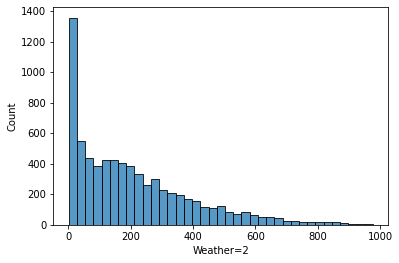

Reject Null Hypothesis : Data is not Gaussian


In [55]:
# Checking Shapiro test
#Ho-  Data is Gaussian
#HA- Data is not Gaussaian

sns.histplot(yulu[yulu["weather"]==1]["count"])
plt.xlabel("Weather=1")
plt.show()
stat,Pvalue=shapiro(yulu[yulu["weather"]==1]["count"])

if Pvalue<0.05:
    print("Reject Null Hypothesis : Data is not Gaussian")
else:
    print("Fail to reject Null Hypothesis : Data is Gaussian")
    
sns.histplot(yulu[yulu["weather"]==1]["count"])
plt.xlabel("Weather=2")
plt.show()
stat,Pvalue=shapiro(yulu[yulu["weather"]==2]["count"])

if Pvalue<0.05:
    print("Reject Null Hypothesis : Data is not Gaussian")
else:
    print("Fail to reject Null Hypothesis : Data is Gaussian")    

In [22]:
# Annova Test on count and season

#Ho- No. of Cycles rented in different  weather is similar
#HA- No. of Cycles rented in different  weather is Different

#Assuming significance level of 5%

w1=yulu[yulu["weather"]==1]["count"]
w2=yulu[yulu["weather"]==2]["count"]
w3=yulu[yulu["weather"]==3]["count"]
w4=yulu[yulu["weather"]==4]["count"]

f_stat,Pvalue=f_oneway(w1,w2,w3,w4)

if Pvalue<0.05:
    print("Reject Null Hypothesis : No. of Cycles rented in different  weather is Different")
else:
    print("Fail to reject Null Hypothesis : No. of Cycles rented in different  weather is similar")

Reject Null Hypothesis : No. of Cycles rented in different  weather is Different


In [21]:
# 2 Samples T-Test on No. of Working Days and no. of cycles rented

#Ho- No impact of Working days on number of cycles rented
#HA- Working Days Impact Number of cycles rented

workday_yes=yulu[yulu["workingday"]==1]["count"]
workday_no=yulu[yulu["workingday"]==0]["count"]

t_stat,Pvalue=ttest_ind_from_stats(workday_yes.mean(),workday_yes.std(),len(workday_yes),
                                  workday_no.mean(),workday_no.std(),len(workday_no))

if Pvalue<0.05:
    print("Reject Null Hypothesis : Working Days Impact Number of cycles rented")
else:
    print("Fail to reject Null Hypothesis : No impact of Working days on number of cycles rented")

Fail to reject Null Hypothesis : No impact of Working days on number of cycles rented


## Insights

1. From Chi Square we get to know Weather and season are dependent

2. From Annova Test we get to know No. of Cycles rented in different  season is Different

3. From Levene and shapiro test we conclude that there is difference in variance for different weather, Hence Violated Assumption of Annova test and Gaussian Normality is not foolowed so also violated the annova assumptions.

4. From 2 Sample test i.e. Ttest we noted that there is No impact of Working days on number of cycles rented

5. We Should more focus on non working days also

6. We should also focus on Holiday to provide yulu services at less rate to attract users for yulu bikes on Holidays days

7. we should introduce some New bikes with having facilty of protecting user from heavy rains , strom so that we can increase our sales on weather=4 days

8. we should decrease our price or offer customer some discount coupons if they use yulu services on holiday and non working days.